# Examen Módulo 2 - Simulación Montecarlo. <font color=blue>Tipo de examen 2</font>.
Lea cuidadosamente las siguientes **indicaciones** antes de comenzar el examen:
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *E2ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *E2ZapataCristian*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

# Primer punto. Evaluación numérica de integrales y áreas usando Montecarlo (30 puntos).

- En la clase de evaluación de integrales numéricas por montecarlo vimos dos tipos de evaluación de integrales.
- El tipo 1 se basaba en la definición de valor promedio de una función.
- El tipo 2 se basaba en probabilidades y una variable aleatoria de bernoulli (para encontrar áreas).

###  Parte A
**Enunciado** Considere las funciones $f_1(x)=\frac{x^3}{\sqrt{1+x^2}}$,  $f_2(x)=\sin(2x)\tan(8x)$, $f_3(x)=\sqrt{x^3}(1+\sin(x^7))$ y $f_4(x)=\log_{10}(2x)+8^x$.



**Punto A.1 (12 puntos)** Definir una función llamada  `montecarlo1` que corresponda al tipo 1 visto en clase para resolver integrales basada en la definición de valor promedio de una función.

**Solución**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def montecarlo1(f, a, b, N):
    u = (b-a)*np.random.rand(N)+a
    return (b-a)*np.mean(f(u))

**Punto A.2 (13 puntos)** Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo (1,6). Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000, 100000, 1000000 y 10000000 términos) y cuyas columnas correspondan a las funciones.

**Solución**

**Solución**

In [3]:
# Funciones
def f1(x):
    return x**3/(np.sqrt(1+x**2))

def f2(x):
    return np.sin(2*x)*np.tan(8*x)

def f3(x):
    return np.sqrt(x**3)*(1+np.sin(x**7))

def f4(x):
    return np.log10(2*x)+(8**x)

a, b = 1, 6
N = np.logspace(1, 7, 7).astype(int)

# DataFrame con resultados
tabla = pd.DataFrame(index = N, columns=['f1', 'f2'])
for n in N:
    tabla.loc[n,'f1'] = montecarlo1(f1, a, b, n)
    tabla.loc[n,'f2'] = montecarlo1(f2, a, b, n)
    tabla.loc[n,'f3'] = montecarlo1(f3, a, b, n)
    tabla.loc[n,'f4'] = montecarlo1(f4, a, b, n)
tabla

,f1,f2,f3,f4
10,58.1258,1.86284,28.730038,4998.422844
100,67.5997,4.90194,30.674179,151599.533083
1000,66.2355,-0.740149,35.849273,136078.322629
10000,69.3009,5.58849,35.374278,123578.055876
100000,69.2814,0.477552,34.771657,125752.920230
1000000,69.4324,3.66678,34.974041,125790.588130
10000000,69.4041,-5.10231,34.973436,126188.973544


###  Parte B
**Enunciado** Considere la región definida por:
$$ \frac{(x-5)^2}{9} + \frac{(y+2)^2}{9} \leq 1 .$$

**Punto B.1 (5 puntos)** Definir una función llamada  `montecarlo2` que corresponda al tipo 2 visto en clase para encontrar áreas basada en probabilidades y una variable aleatoria de bernoulli.

**Solución**

In [4]:
def montecarlo2(R,a1,b1,a2,b2,N):
    A_R=(b1-a1)*(b2-a2)
    x= np.random.uniform(a1,b1, N)
    y= np.random.uniform(a2,b2, N)
    return A_R*np.sum(R(x,y))/N

**Punto B.2 (5 puntos)** Graficar la región dada anteriormente y encontrar los límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$

**Solución**

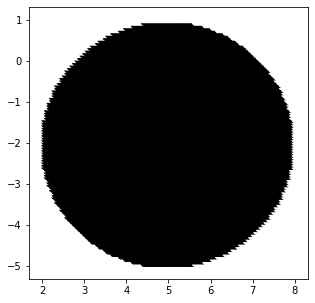

In [5]:
N= 100
x=np.linspace(2,8,N)
y=np.linspace(-5,1,N)


def R1(x,y):
    return ((x-5)**2) + ((y+2)**2)<=9 

X , Y= np.meshgrid(x,y)
plt.figure(figsize=(5,5))
plt.scatter(X,Y,c=~R1(X,Y),cmap='bone')
plt.show()

**Punto B.3 (10 puntos)** Utilizar la función `montecarlo2` para realizar la evaluación numérica del área. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000, 100000, 1000000 y 10000000 términos) y cuyas columnas correspondan a las funciones.

**Solución**

In [6]:
# Resolver
a1,a2,b1,b2=2,-5,8,1
N=np.logspace(1,7,7).astype(int)

df= pd.DataFrame(index=N,columns=['Approx','Error'])

for n in N:
    df.loc[n,'Approx'] = montecarlo2(R1,a1,b1,a2,b2,n)
df['Error'] = np.abs(df['Approx']-9*np.pi)
df

,Approx,Error
10,32.4,4.12567
100,28.08,0.194334
1000,28.476,0.201666
10000,28.1952,0.0791339
100000,28.3277,0.0533461
1000000,28.2613,0.0130019
10000000,28.2739,0.000441482


# Segundo punto. Fractal aleatorio tipo Barnsley (30 puntos).

**Enunciado**

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales.

Como en la clase de fractales, repliquemos un fractal descrito por la siguiente tabla:

|  i | $a_i$ | $b_i$ | $c_i$ | $d_i$ | $e_i$ | $f_i$ | 
|:--:|:-----:|:-----:|:-----:|:-----:|:-----:|-------|
|  0 |   0.39 | 	0.43 |	0.43 |	-0.39 |	12.8 | 26.1 |
|  1 |  0.44 |	-0.09 |	-0.01 |	-0.32 |	21.1 | 25.3 |
|  2 | -0.47 |	0.02 |	-0.11 |	0.02 |	20.0 |	20.0 |	0.33|

**Nota: Las probabilidades de ocurrencia de cada uno de los valores de $i$ son iguales.**

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

**Punto 1 (10 puntos)** Definir los datos de la tabla anterior en un DataFrame de `pandas`, donde el index sea la variable $i=0,1,2$ y las columnas estén definidas por las constantes $a_i, \ldots,\,f_i,\,p_i$.

**Solución**

In [7]:
import pandas as pd
import numpy as np
import random

In [8]:
i = np.arange(3)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"
          
df['$a_i$'] = [0.387, 0.441, -0.468]
df['$b_i$'] = [0.43, -0.091, 0.020]
df['$c_i$'] = [0.43, -0.009, -0.113]
df['$d_i$'] = [-0.387, -0.322, 0.015]
df['$e_i$'] = [12.8, 21.095, 20.0]
df['$f_i$'] = [26.10, 25.295, 20.0]
df['$p_i$'] = [1/3, 1/3, 1/3]

df.round(2)

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.39,0.43,0.43,-0.39,12.8,26.1,0.33
1,0.44,-0.09,-0.01,-0.32,21.1,25.3,0.33
2,-0.47,0.02,-0.11,0.02,20.0,20.0,0.33


**Punto 2 (10 puntos)** Guardar los datos del DataFrame anterior en un arreglo matricial de `numpy`.

**Solución**

In [9]:
# Matriz de Barnsley
Mat_Barnsley = df.iloc[:,:].values
Mat_Barnsley

array([[ 3.87000000e-01,  4.30000000e-01,  4.30000000e-01,
        -3.87000000e-01,  1.28000000e+01,  2.61000000e+01,
         3.33333333e-01],
       [ 4.41000000e-01, -9.10000000e-02, -9.00000000e-03,
        -3.22000000e-01,  2.10950000e+01,  2.52950000e+01,
         3.33333333e-01],
       [-4.68000000e-01,  2.00000000e-02, -1.13000000e-01,
         1.50000000e-02,  2.00000000e+01,  2.00000000e+01,
         3.33333333e-01]])

In [23]:
import random
help(random.choices)

Help on method choices in module random:

choices(population, weights=None, *, cum_weights=None, k=1) method of random.Random instance
    Return a k sized list of population elements chosen with replacement.
    
    If the relative weights or cumulative weights are not specified,
    the selections are made with equal probability.



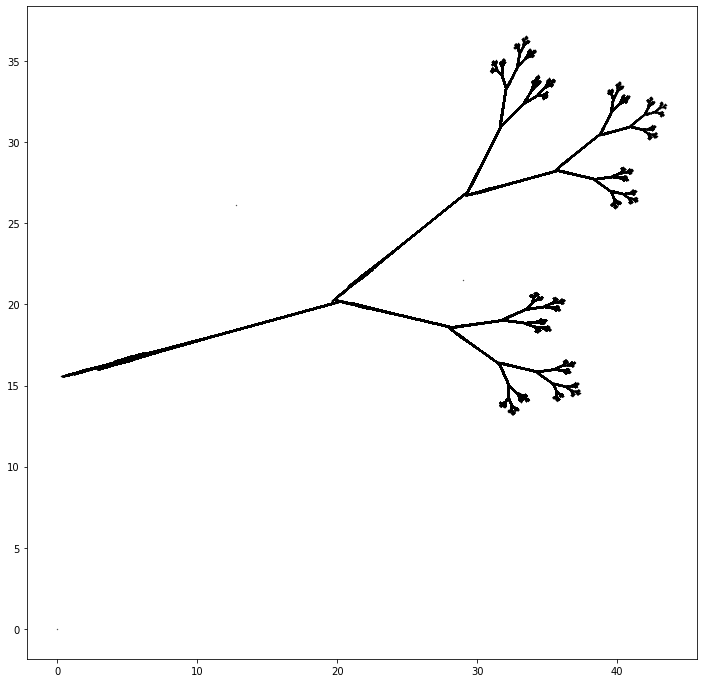

In [10]:
# Iteraciones para generar el fractal
# Punto inicial
x, y = [0], [0]
# Valores de i con su probabilidad
seq = [0,1,2]
prob = Mat_Barnsley[:,-1]
a = Mat_Barnsley[:,0]
b = Mat_Barnsley[:,1]
c = Mat_Barnsley[:,2]
d = Mat_Barnsley[:,3]
e = Mat_Barnsley[:,4]
f = Mat_Barnsley[:,5]
# Generación de puntos con las frecuencias dadas
for k in range(500000):
    i = random.choices(seq,prob)
    x.append(a[i]*x[k]+b[i]*y[k]+e[i])
    y.append(c[i]*x[k]+d[i]*y[k]+f[i])
# Graficamos
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c='k', s=0.1)
plt.show()

# Tercer punto. Probabilidad Precio-Umbral (40 puntos).

**Enunciado**

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

**Punto 1 (10 puntos)** Descargar datos de los precios ajustados al cierre desde `yahoo finance` de los activos: Ford Motor Company y Tesla, Inc. en un DataFrame de `pandas` con ayuda del módulo `pandas-datareader`.

Considere como fecha de inicio el 1-Enero-2016 y fecha final el 31-Diciembre-2018.

Grafique los datos obtenidos en un mismo gráfico.

**Solución**

**Solución**

In [11]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def get_closes(names, start_date, end_date):
    closes = web.DataReader(name = names,
                            data_source="yahoo",
                            start=start_date,
                           end=end_date)
    return closes['Adj Close']

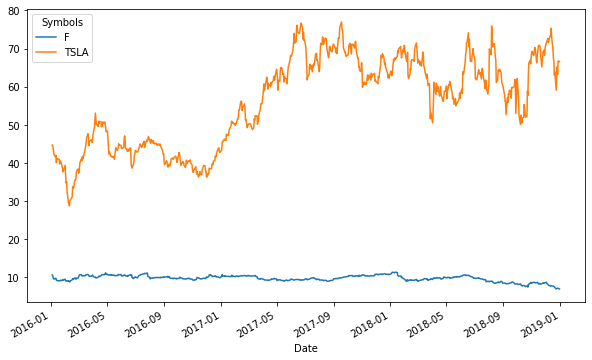

In [13]:
# Precios
names = ['F','TSLA']
start, end = '2016-01-01', '2018-12-31'
closes = get_closes(names=names, start_date=start, end_date=end)
closes.plot(figsize=(10,6));

**Punto 2 (10 puntos)**. Calcule los rendimientos porcentuales diarios de los dos activos junto con sus características estadísticas (media y desviación estándar).

Grafique dichos rendimientos en un mismo gráfico.

**Solución**

(-0.00044699165914331777,
 0.0009312714599158902,
 0.015201931569662038,
 0.0284673690235674)

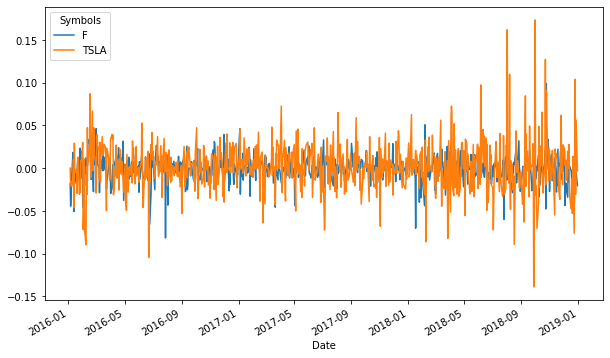

In [14]:
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

mu_F, mu_TSLA = ret.mean().F, ret.mean()['TSLA']  ## ret.mean()['BIMBOA.MX']
std_F, std_TSLA= ret.std().F, ret.std().TSLA
mu_F, mu_TSLA, std_F, std_TSLA

**Punto 3 (10 puntos)** Simular 1000 escenarios de rendimientos diarios para el año 2019 (para cada una de las empresas). Con estos rendimientos simulados, encontrar los respectivos precios al cierre simulados usando la fórmula repectiva. Graficar dichos precios simulados **en una gráfica diferente para cada empresa**.

**Solución**

In [15]:
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)


simret_F = ret_sim(mu_F, std_F, 252, 1000, '2019-01-01')
simret_TSLA = ret_sim(mu_TSLA ,std_TSLA , 252, 1000, '2019-01-01')

In [24]:
simcloses_F = closes.iloc[-1].F*((1+simret_F).cumprod())
simcloses_TSLA= closes.iloc[-1].TSLA*((1+simret_TSLA).cumprod())

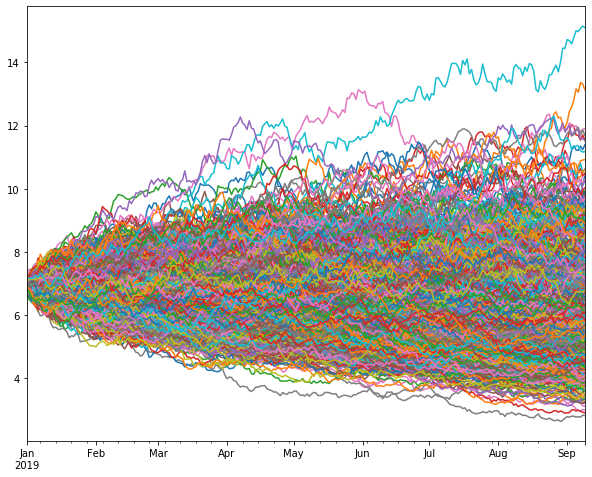

In [17]:
simcloses_F.plot(figsize=(10,8),legend=False);

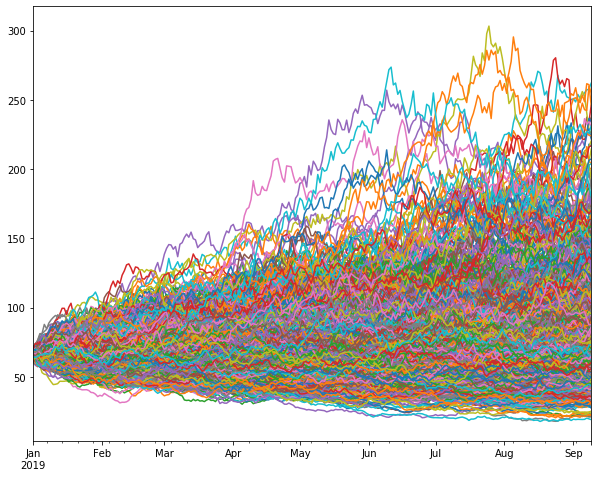

In [18]:
simcloses_TSLA.plot(figsize=(10,8),legend=False);

**Punto 4 (10 puntos)** Calcular las probabilidades con base en una tasa de interés anual deseada del $10\%$.


**Solución**

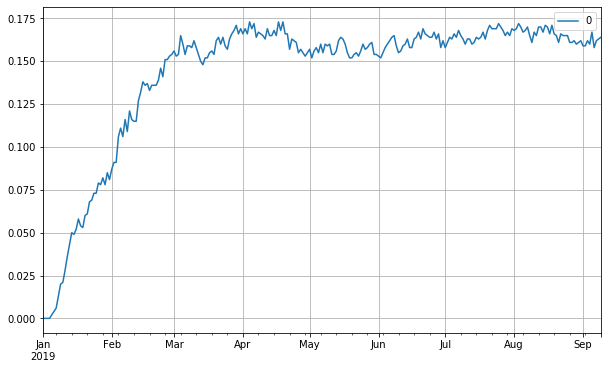

In [19]:
K_F = (1+0.1)*closes.iloc[-1].F
print(K_F)
prob = pd.DataFrame((simcloses_F>K_F).sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True)

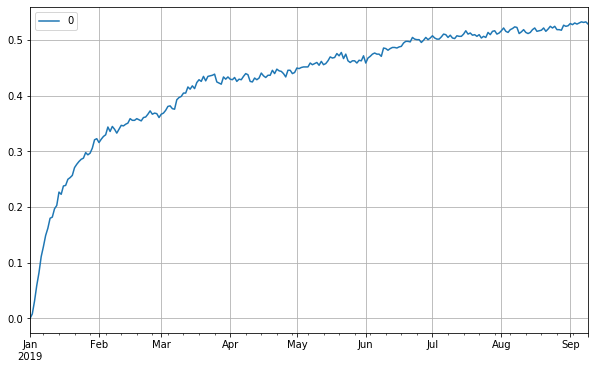

In [20]:
K_TSLA= (1+0.1)*closes.iloc[-1].TSLA
prob = pd.DataFrame((simcloses_TSLA>K_TSLA).sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

**Punto extra (Bonus) (10 puntos)** Este punto no es obligatorio, es opcional y sirve como puntos extras para el que desee resolverlo correctamente (No se dará puntos parciales para este bonus, es decir o se obtiene 0 puntos o se obtienen 10 puntos, no hay puntos intermedios).

Descargue los datos de cada activo (empresa) del año 2019 y haga un análisis minucioso y detallado de éstos valores reales respecto a los simulados y a las probabilidades obtenidas en el punto anterior.

El análisis debe realizarse para cada empresa y se debe evaluar y concluir que tan acertados fueron los resultados anteriores.

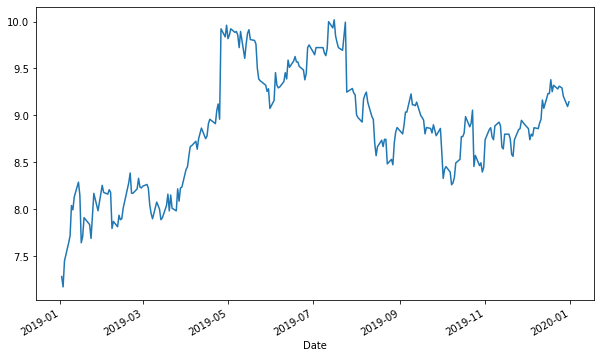

In [21]:
start, end = '2019-01-01', '2019-12-31'
name = ['F','TSLA']
closes2018 = get_closes(names=name, start_date=start, end_date=end)
closes2018.F.plot(figsize=(10,6));

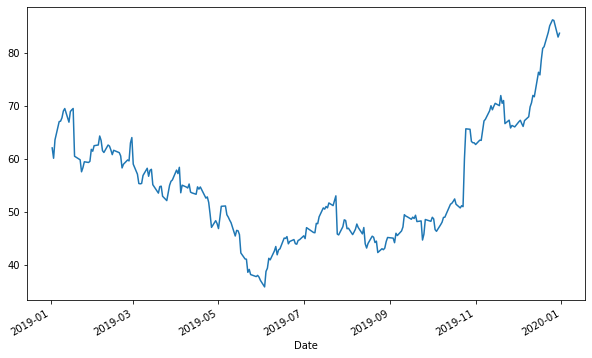

In [22]:
closes2018.TSLA.plot(figsize=(10,6));